# Lavrinenko Olga: final task

- The data set is stored in JSON format, the structure is as follows: Paper: { papers have an associated timespan and a paper ID, each paper contains some reviews. The reviews have their own ID, the review text, the remarks (which can be empty), the language of the review, its orientation and evaluation.
- The dataset contains texts (a mixture of Spanish and English). You need to predict the variable "evaluation"
- The texts are in the variable "text".
- You need to build a classifier that predicts the maximum Fscore values for each class.

# 1. Data preporation

## 1.1 Loading the database

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import json

data = 'D:/Data Analytics For Politics And Society/II year_Text mining Advanced Level (1 modul)\Final task/reviews.json'
with open(data, encoding='utf-8') as data_json: 
    data = json.load(data_json)
print(type(data))    

data = pd.DataFrame.from_dict(data)
data

<class 'dict'>


,paper
0,"{'id': 1, 'preliminary_decision': 'accept', 'r..."
1,"{'id': 2, 'preliminary_decision': 'accept', 'r..."
2,"{'id': 3, 'preliminary_decision': 'accept', 'r..."
3,"{'id': 4, 'preliminary_decision': 'accept', 'r..."
4,"{'id': 5, 'preliminary_decision': 'accept', 'r..."
...,...
167,"{'id': 168, 'preliminary_decision': 'accept', ..."
168,"{'id': 169, 'preliminary_decision': 'accept', ..."
169,"{'id': 170, 'preliminary_decision': 'reject', ..."
170,"{'id': 171, 'preliminary_decision': 'accept', ..."


## 1.2 Data normalization

In [2]:
data = pd.json_normalize(data['paper'])
data

,id,preliminary_decision,review
0,1,accept,"[{'confidence': '4', 'evaluation': '1', 'id': ..."
1,2,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
2,3,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
3,4,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
4,5,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
...,...,...,...
167,168,accept,"[{'confidence': '3', 'evaluation': '2', 'id': ..."
168,169,accept,"[{'confidence': '3', 'evaluation': '1', 'id': ..."
169,170,reject,"[{'confidence': '5', 'evaluation': '-1', 'id':..."
170,171,accept,"[{'confidence': '4', 'evaluation': '-1', 'id':..."


In [11]:
exploded_data = data.explode("review", ignore_index = True)
pd.json_normalize(exploded_data['review'])
data_normalized = pd.concat([exploded_data.drop('review', axis = 1),
pd.json_normalize(exploded_data['review'])], axis = 1)

## 1.3 Removing rows where evaluation is missed

In [12]:
data_normalized['evaluation'].isnull().sum().sum ()

3

In [13]:
data_normalized.dropna(subset = ['evaluation'], inplace=True)
data_normalized = data_normalized.reset_index(drop=True)

num_rows, num_feature = data_normalized.shape
data_copy = data_normalized

In [14]:
data_normalized

,id,preliminary_decision,confidence,evaluation,id,lan,orientation,remarks,text,timespan
0,1,accept,4,1,1.0,es,0,,- El artículo aborda un problema contingente y...,2010-07-05
1,1,accept,4,1,2.0,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05
2,1,accept,5,1,3.0,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05
3,2,accept,4,2,1.0,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05
4,2,accept,4,2,2.0,es,0,,,2010-07-05
...,...,...,...,...,...,...,...,...,...,...
400,170,reject,5,-1,1.0,es,-2,,El trabajo pretende ofrecer una visión del uso...,2015-07-05
401,170,reject,4,-1,2.0,es,-1,,El paper está bien escrito y de fácil lectura....,2015-07-05
402,171,accept,4,-1,1.0,es,0,,Observación de fondo: No se presenta un ejemp...,2015-07-05
403,171,accept,3,1,2.0,es,-1,,Se propone un procedimiento para elaborar máqu...,2015-07-05


# 2. Review of Variables of Interest

## 2.1 Language distribution

es    388
en     17
Name: lan, dtype: int64


<Axes: >

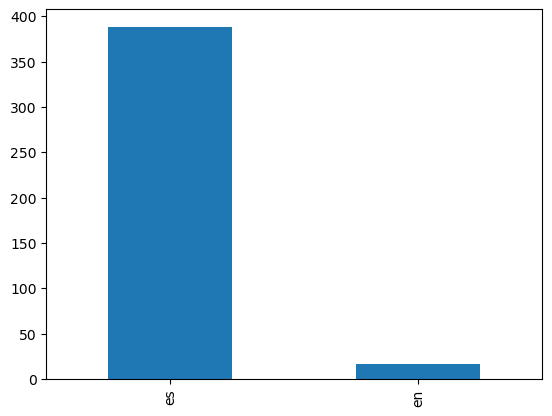

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
language = data_normalized['lan'].value_counts()
print(language)
language.plot(kind='bar')

## 2.2 Evaluation distribution

2     109
1      87
-2     86
0      64
-1     59
Name: evaluation, dtype: int64


<Axes: >

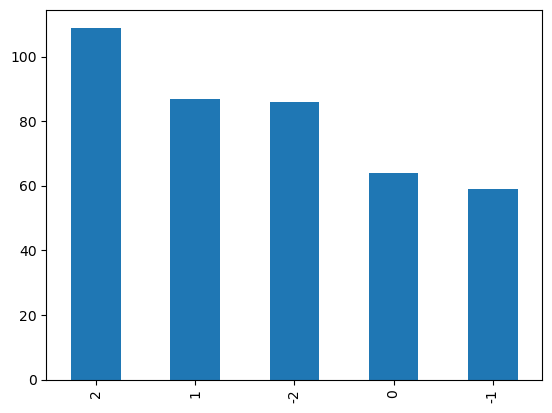

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
evaluation = data_normalized['evaluation'].value_counts()
print(evaluation)
evaluation.plot(kind='bar')

# 3. Data preprossing: cleaning and lemmatization

## 3.1 Cleaning

In [17]:
import time
from tqdm import tqdm
import re

start = time.time()

# An empty list
y_data = []

# Cleaning
for i in tqdm(range(num_rows)):
    doc = str(data_normalized['text'][i])
    doc_cleaned = re.sub(r"[,.!?¿“/@#$:1234567890#—ツ►๑۩۞۩•*”˜˜”*°°*`)(]", '', doc)
    y_data.append(doc_cleaned)    
stop = time.time()

100%|██████████████████████████████████████████████████████████████████████████████| 405/405 [00:00<00:00, 8178.90it/s]


In [20]:
data_cleaned =  pd.DataFrame(y_data)
data_cleaned.columns = ['text']
data_cleaned = pd.concat([data_cleaned, data_copy['lan'], data_copy['evaluation']], axis = 1)

In [21]:
data_cleaned

,text,lan,evaluation
0,- El artículo aborda un problema contingente y...,es,1
1,El artículo presenta recomendaciones prácticas...,es,1
2,- El tema es muy interesante y puede ser de mu...,es,1
3,Se explica en forma ordenada y didáctica una e...,es,2
4,,es,2
...,...,...,...
400,El trabajo pretende ofrecer una visión del uso...,es,-1
401,El paper está bien escrito y de fácil lectura ...,es,-1
402,Observación de fondo No se presenta un ejempl...,es,-1
403,Se propone un procedimiento para elaborar máqu...,es,1


## 3.2 Lemmatization texts in Spanish

In [22]:
data_spanish = data_cleaned[data_cleaned['lan'] == 'es']
data_spanish

,text,lan,evaluation
0,- El artículo aborda un problema contingente y...,es,1
1,El artículo presenta recomendaciones prácticas...,es,1
2,- El tema es muy interesante y puede ser de mu...,es,1
3,Se explica en forma ordenada y didáctica una e...,es,2
4,,es,2
...,...,...,...
400,El trabajo pretende ofrecer una visión del uso...,es,-1
401,El paper está bien escrito y de fácil lectura ...,es,-1
402,Observación de fondo No se presenta un ejempl...,es,-1
403,Se propone un procedimiento para elaborar máqu...,es,1


In [23]:
import spacy

nlp = spacy.load('es_core_news_sm')
data_spanish["lemmatized"] = data_spanish['text'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x)]))
data_spanish

C:\Users\Olga Lavrinenko\AppData\Local\Temp\ipykernel_16240\3476605108.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spanish["lemmatized"] = data_spanish['text'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x)]))


,text,lan,evaluation,lemmatized
0,- El artículo aborda un problema contingente y...,es,1,- el artículo abordar uno problema contingente...
1,El artículo presenta recomendaciones prácticas...,es,1,el artículo presentar recomendación práctico p...
2,- El tema es muy interesante y puede ser de mu...,es,1,- el tema ser mucho interesante y poder ser de...
3,Se explica en forma ordenada y didáctica una e...,es,2,él explicar en forma ordenado y didáctico uno ...
4,,es,2,
...,...,...,...,...
400,El trabajo pretende ofrecer una visión del uso...,es,-1,el trabajo pretender ofrecer uno visión del us...
401,El paper está bien escrito y de fácil lectura ...,es,-1,el paper estar bien escrito y de fácil lectura...
402,Observación de fondo No se presenta un ejempl...,es,-1,Observación de fondo no él presentar uno eje...
403,Se propone un procedimiento para elaborar máqu...,es,1,él proponer uno procedimiento para elaborar má...


## 3.3 Removing stop-words from texts in Spanish

In [24]:
stop_words_es ='D:/Data Analytics For Politics And Society/II year_Text mining Advanced Level (1 modul)/Final task/stopwords-es.txt'
stop_words_es = pd.read_csv(stop_words_es)
print(stop_words_es)

my_stop_es = stop_words_es['Stop words'].values.tolist()

    Stop words
0            0
1            1
2            2
3            3
4            4
..         ...
727      éstos
728     última
729    últimas
730     último
731    últimos

[732 rows x 1 columns]


In [25]:
data_spanish['text_without_stopwords'] = data_spanish['lemmatized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (my_stop_es)]))
data_spanish

C:\Users\Olga Lavrinenko\AppData\Local\Temp\ipykernel_16240\1170024078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spanish['text_without_stopwords'] = data_spanish['lemmatized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (my_stop_es)]))


,text,lan,evaluation,lemmatized,text_without_stopwords
0,- El artículo aborda un problema contingente y...,es,1,- el artículo abordar uno problema contingente...,- artículo abordar problema contingente releva...
1,El artículo presenta recomendaciones prácticas...,es,1,el artículo presentar recomendación práctico p...,artículo presentar recomendación práctico desa...
2,- El tema es muy interesante y puede ser de mu...,es,1,- el tema ser mucho interesante y poder ser de...,- tema interesante ayuda guía incorporar práct...
3,Se explica en forma ordenada y didáctica una e...,es,2,él explicar en forma ordenado y didáctico uno ...,explicar forma ordenado didáctico experiencia ...
4,,es,2,,
...,...,...,...,...,...
400,El trabajo pretende ofrecer una visión del uso...,es,-1,el trabajo pretender ofrecer uno visión del us...,pretender ofrecer visión herramienta EVA entor...
401,El paper está bien escrito y de fácil lectura ...,es,-1,el paper estar bien escrito y de fácil lectura...,paper escrito fácil lectura ajustar formato ev...
402,Observación de fondo No se presenta un ejempl...,es,-1,Observación de fondo no él presentar uno eje...,Observación fondo presentar implementación int...
403,Se propone un procedimiento para elaborar máqu...,es,1,él proponer uno procedimiento para elaborar má...,proponer procedimiento elaborar máquina dispos...


## 3.4 Lemmatization texts in English

In [26]:
data_english = data_cleaned[data_cleaned['lan'] == 'en']
data_english

,text,lan,evaluation
7,This paper aims to show new deployment alterna...,en,2
8,The paper is well structured It follows a logi...,en,0
19,The paper describes an experience concerning t...,en,1
20,This manuscript addresses an interesting solut...,en,2
21,Interesting application domain Nothing new fr...,en,1
30,This paper presents a software tool that is us...,en,2
48,This paper is very interesting I like the idea...,en,2
78,I don't think the work reported in this paper ...,en,-2
88,Abstract Needs to have a definition of ERP - c...,en,-1
99,The paper introduces a segmentation procedure ...,en,2


In [27]:
nlp = spacy.load('en_core_web_sm')
data_english["lemmatized"] = data_english['text'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x)]))
data_english

C:\Users\Olga Lavrinenko\AppData\Local\Temp\ipykernel_16240\264771845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_english["lemmatized"] = data_english['text'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x)]))


,text,lan,evaluation,lemmatized
7,This paper aims to show new deployment alterna...,en,2,this paper aim to show new deployment alternat...
8,The paper is well structured It follows a logi...,en,0,the paper be well structured it follow a logic...
19,The paper describes an experience concerning t...,en,1,the paper describe an experience concern the a...
20,This manuscript addresses an interesting solut...,en,2,this manuscript address an interesting solutio...
21,Interesting application domain Nothing new fr...,en,1,interesting application domain nothing new f...
30,This paper presents a software tool that is us...,en,2,this paper present a software tool that be use...
48,This paper is very interesting I like the idea...,en,2,this paper be very interesting I like the idea...
78,I don't think the work reported in this paper ...,en,-2,I do not think the work report in this paper b...
88,Abstract Needs to have a definition of ERP - c...,en,-1,abstract need to have a definition of ERP - ca...
99,The paper introduces a segmentation procedure ...,en,2,the paper introduce a segmentation procedure f...


## 3.5 Removing stop-words from texts in English

In [28]:
stop_words_en ='D:/Data Analytics For Politics And Society/II year_Text mining Advanced Level (1 modul)/Final task/stopwords-en.txt'
stop_words_en = pd.read_csv(stop_words_en)
print(stop_words_en)

my_stop_en = stop_words_en['Stop words'].values.tolist()

    Stop words
0            '
1            i
2           me
3           my
4       myself
..         ...
123       will
124       just
125        don
126     should
127        now

[128 rows x 1 columns]


In [29]:
data_english['text_without_stopwords'] = data_english['lemmatized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (my_stop_en)]))
data_english

C:\Users\Olga Lavrinenko\AppData\Local\Temp\ipykernel_16240\208878383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_english['text_without_stopwords'] = data_english['lemmatized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (my_stop_en)]))


,text,lan,evaluation,lemmatized,text_without_stopwords
7,This paper aims to show new deployment alterna...,en,2,this paper aim to show new deployment alternat...,paper aim show new deployment alternative reco...
8,The paper is well structured It follows a logi...,en,0,the paper be well structured it follow a logic...,paper well structured follow logical sequence ...
19,The paper describes an experience concerning t...,en,1,the paper describe an experience concern the a...,paper describe experience concern automate ins...
20,This manuscript addresses an interesting solut...,en,2,this manuscript address an interesting solutio...,manuscript address interesting solution base m...
21,Interesting application domain Nothing new fr...,en,1,interesting application domain nothing new f...,interesting application domain nothing new mac...
30,This paper presents a software tool that is us...,en,2,this paper present a software tool that be use...,paper present software tool useful context sof...
48,This paper is very interesting I like the idea...,en,2,this paper be very interesting I like the idea...,paper interesting I like idea make work publis...
78,I don't think the work reported in this paper ...,en,-2,I do not think the work report in this paper b...,I think work report paper suitable SCCC confer...
88,Abstract Needs to have a definition of ERP - c...,en,-1,abstract need to have a definition of ERP - ca...,abstract need definition ERP - assume reader k...
99,The paper introduces a segmentation procedure ...,en,2,the paper introduce a segmentation procedure f...,paper introduce segmentation procedure breast ...


## 3.6 Data concatenation

In [30]:
concat_data = pd.concat([data_english, data_spanish], ignore_index=True) 
concat_data

,text,lan,evaluation,lemmatized,text_without_stopwords
0,This paper aims to show new deployment alterna...,en,2,this paper aim to show new deployment alternat...,paper aim show new deployment alternative reco...
1,The paper is well structured It follows a logi...,en,0,the paper be well structured it follow a logic...,paper well structured follow logical sequence ...
2,The paper describes an experience concerning t...,en,1,the paper describe an experience concern the a...,paper describe experience concern automate ins...
3,This manuscript addresses an interesting solut...,en,2,this manuscript address an interesting solutio...,manuscript address interesting solution base m...
4,Interesting application domain Nothing new fr...,en,1,interesting application domain nothing new f...,interesting application domain nothing new mac...
...,...,...,...,...,...
400,El trabajo pretende ofrecer una visión del uso...,es,-1,el trabajo pretender ofrecer uno visión del us...,pretender ofrecer visión herramienta EVA entor...
401,El paper está bien escrito y de fácil lectura ...,es,-1,el paper estar bien escrito y de fácil lectura...,paper escrito fácil lectura ajustar formato ev...
402,Observación de fondo No se presenta un ejempl...,es,-1,Observación de fondo no él presentar uno eje...,Observación fondo presentar implementación int...
403,Se propone un procedimiento para elaborar máqu...,es,1,él proponer uno procedimiento para elaborar má...,proponer procedimiento elaborar máquina dispos...


In [31]:
data_final = concat_data.iloc [:, [2,4]]
data_final = data_final.rename(columns = {' evaluation ':' evaluation', 'text_without_stopwords': 'text'})
data_copy = data_final
data_final

,evaluation,text
0,2,paper aim show new deployment alternative reco...
1,0,paper well structured follow logical sequence ...
2,1,paper describe experience concern automate ins...
3,2,manuscript address interesting solution base m...
4,1,interesting application domain nothing new mac...
...,...,...
400,-1,pretender ofrecer visión herramienta EVA entor...
401,-1,paper escrito fácil lectura ajustar formato ev...
402,-1,Observación fondo presentar implementación int...
403,1,proponer procedimiento elaborar máquina dispos...


# 4. Preporation of the categories

In [32]:
y_data = data_final['text'].values.tolist()
Y = data_copy['evaluation']
y_dummy = pd.get_dummies(data_copy['evaluation'])
y_dummy

,-1,-2,0,1,2
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,0,1,0
...,...,...,...,...,...
400,1,0,0,0,0
401,1,0,0,0,0
402,1,0,0,0,0
403,0,0,0,1,0


# 5. doc2vec creating

In [33]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import time

start_time = time.time()
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(y_data)]

# building a model where we set vector size = 100
model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4)
model.build_vocab(documents)

# model training
model.train(documents, total_examples=model.corpus_count, epochs=50)
end_time = time.time()
print('time of doc2vec creating: ', end_time - start_time)

time of doc2vec creating:  13.04939603805542


# 6. Upsampling

In [34]:
my_array = np.empty((len(model.dv), 100))
num, col = my_array.shape
print(num,  col)
for i in range(num):
    mm = model.dv[i]
    for j in range(col): 
        my_array [i, j] = mm[j]

405 100


In [35]:
#convert NumPy array to pandas DataFrame
newdata = pd.DataFrame(data = my_array)
print(newdata.shape)

# Now let's combine our chips with our labels
newdata = pd.concat([newdata,  Y], axis=1)

print('final size: ', newdata.shape)
#print(list(newdata))
newdata.head(10)

(405, 100)
final size:  (405, 101)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,evaluation
0,0.024489,-0.463933,-0.213011,-0.019707,0.094183,-0.451958,0.544184,0.244941,0.041495,-0.911426,...,-0.271941,-0.554647,-0.305564,0.574617,-0.985717,0.624617,0.622033,-0.495233,-0.573185,2
1,-0.246480,-0.395638,-0.017801,-0.379917,0.050177,0.230437,-0.079181,-0.185162,0.272730,-0.350000,...,0.360148,-0.151062,-0.186174,0.647500,-0.007447,0.508619,1.199466,-0.166574,-0.465180,0
2,-0.151598,-0.775064,-1.043513,-0.428761,0.146906,0.471053,0.658551,0.275053,0.280985,-0.435497,...,0.220572,-0.026402,-0.616791,0.544853,-0.391294,0.766043,0.951590,-0.125215,-0.933611,1
3,0.003292,-0.317869,-0.859863,0.309435,0.189041,0.337228,0.225290,0.209885,-0.021443,-0.271916,...,0.175035,-0.225448,0.087526,0.228802,-0.654254,0.457305,0.487452,-0.477614,-0.405556,2
4,0.033193,-0.626623,-0.022065,0.111378,-0.053273,0.032161,0.577099,0.458069,-0.079076,-0.578071,...,-0.326680,-0.124806,-0.420020,0.008294,-0.444949,0.822688,0.509239,-0.205892,-0.707624,1
5,-0.109517,-0.061158,-0.098830,-0.597809,-0.153604,0.301770,-0.029900,-0.308905,-0.111541,-0.419275,...,0.211617,-0.324986,-0.230040,0.241378,-0.303537,0.339122,0.049348,-0.494130,-0.364839,2
6,-0.231104,0.034061,-0.099630,-0.050230,-0.087593,0.302825,-0.070792,-0.038459,0.277040,-0.032337,...,0.257596,-0.434306,-0.397026,0.279765,0.113436,0.605476,0.668810,-0.052241,-0.139628,2
7,0.117873,0.015882,-0.383715,0.213006,-0.048578,0.477023,0.253130,-0.288918,0.080309,-0.362000,...,0.508150,-0.033356,-0.172713,0.406876,0.013243,0.276682,0.737302,-0.042114,-0.233607,-2
8,0.022572,-0.685721,-0.539255,-0.230120,-0.543527,0.047027,-0.471898,0.113234,-0.027451,-0.400009,...,0.246760,-0.218087,-0.309980,0.302642,-0.039199,0.049484,0.990783,-0.336937,-0.242419,-1
9,0.076509,0.053156,-0.979992,-0.517026,-0.015442,0.446063,0.052088,-0.265151,0.305506,-0.406591,...,0.663248,0.147266,0.171421,1.118117,-0.485399,0.834799,0.013627,-0.604889,-0.462867,2


In [36]:
vc= newdata['evaluation'].value_counts()
vc

2     109
1      87
-2     86
0      64
-1     59
Name: evaluation, dtype: int64

In [37]:
minus_two_df= newdata[newdata['evaluation'] == '-2']
minus_one_df= newdata[newdata['evaluation'] == '-1']
zero_df= newdata[newdata['evaluation'] == '0']
one_df= newdata[newdata['evaluation'] == '1']
two_df= newdata[newdata['evaluation'] == '2']

In [38]:
from sklearn.utils import resample
print('minus_two before sampling: ', minus_two_df.shape)

minus_two_upsample = resample(minus_two_df, 
             replace=True,
             n_samples=209,
             random_state=42)

print('minus_two after sampling: ', minus_two_upsample.shape)

minus_two before sampling:  (86, 101)
minus_two after sampling:  (209, 101)


In [39]:
from sklearn.utils import resample
print('minus_one before sampling: ', minus_one_df.shape)

minus_one_upsample = resample(minus_one_df, 
             replace=True,
             n_samples=209,
             random_state=42)

print('minus_one after sampling: ', minus_one_upsample.shape)

minus_one before sampling:  (59, 101)
minus_one after sampling:  (209, 101)


In [40]:
from sklearn.utils import resample
print('zero before sampling: ', zero_df.shape)

zero_upsample = resample(zero_df, 
             replace=True,
             n_samples=209,
             random_state=42)

print('zero after sampling: ', zero_upsample.shape)

zero before sampling:  (64, 101)
zero after sampling:  (209, 101)


In [41]:
from sklearn.utils import resample
print('one before sampling: ', one_df.shape)

one_upsample = resample(one_df, 
             replace=True,
             n_samples=209,
             random_state=42)

print('one after sampling: ', one_upsample.shape)

one before sampling:  (87, 101)
one after sampling:  (209, 101)


In [42]:
from sklearn.utils import resample
print('two before sampling: ', two_df.shape)

two_upsample = resample(two_df, 
             replace=True,
             n_samples=209,
             random_state=42)

print('two after sampling: ', two_upsample.shape)

two before sampling:  (109, 101)
two after sampling:  (209, 101)


# 7. Merging our categories into a single dataset

In [43]:
full_down_sample_example = pd.concat([minus_two_upsample, minus_one_upsample, zero_upsample, one_upsample, two_upsample], axis=0)
print(full_down_sample_example.shape)

(1045, 101)


In [44]:
from sklearn.utils import shuffle
full_down_sample_example = shuffle(full_down_sample_example)
full_down_sample_example = shuffle(full_down_sample_example)
full_down_sample_example = shuffle(full_down_sample_example)
# reset indexes
full_down_sample_example_reset_index = full_down_sample_example.reset_index()

In [45]:
full_down_sample_example_reset_index

# separate vector of lables
Y = full_down_sample_example_reset_index['evaluation']

# delete unimportamte coluns
del full_down_sample_example_reset_index['evaluation']
del full_down_sample_example_reset_index['index']
full_down_sample_example_reset_index

# Prepare our labels for the neural network
# One hot encoding
y_dummy = pd.get_dummies(Y)
y_dummy

,-1,-2,0,1,2
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
1040,0,0,0,0,1
1041,0,1,0,0,0
1042,0,0,0,1,0
1043,0,1,0,0,0


# 8. Splitting the dataset into a test and a training part

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(full_down_sample_example_reset_index,
                                                      y_dummy, test_size=0.2, random_state = 42,
                                                      stratify=Y)
print('x_train: ', x_train.shape)
print('x_valid: ', x_valid.shape)
print('------------------------------')
print('y_train: ' , y_train.shape)
print('y_valid: ' , y_valid.shape)

x_train:  (836, 100)
x_valid:  (209, 100)
------------------------------
y_train:  (836, 5)
y_valid:  (209, 5)


# 9. Building NN

In [47]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras import models
from keras import layers

max_features = 100

model = Sequential()
model.add(layers.Dense(646, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(564, activation='relu'))
model.add(layers.Dense(264, activation='relu'))
model.add(layers.Dense(64,  activation='relu'))
model.add(layers.Dense(64,  activation='relu'))
model.add(layers.Dense(564, activation='relu'))
model.add(layers.Dense(264, activation='relu'))
model.add(layers.Dense(64,  activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 646)               65246     
                                                                 
 dense_1 (Dense)             (None, 564)               364908    
                                                                 
 dense_2 (Dense)             (None, 264)               149160    
                                                                 
 dense_3 (Dense)             (None, 64)                16960     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 564)               36660     
                                                                 
 dense_6 (Dense)             (None, 264)               1

In [48]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_valid, y_valid))

Epoch 1/50
2/2 [==============================] - 3s 688ms/step - loss: 1.6094 - accuracy: 0.1842 - val_loss: 1.6054 - val_accuracy: 0.2249
Epoch 2/50
2/2 [==============================] - 0s 98ms/step - loss: 1.6064 - accuracy: 0.2153 - val_loss: 1.6037 - val_accuracy: 0.2632
Epoch 3/50
2/2 [==============================] - 0s 97ms/step - loss: 1.6018 - accuracy: 0.2536 - val_loss: 1.5993 - val_accuracy: 0.3206
Epoch 4/50
2/2 [==============================] - 0s 89ms/step - loss: 1.5939 - accuracy: 0.3158 - val_loss: 1.5960 - val_accuracy: 0.2105
Epoch 5/50
2/2 [==============================] - 0s 93ms/step - loss: 1.5827 - accuracy: 0.2608 - val_loss: 1.5751 - val_accuracy: 0.2249
Epoch 6/50
2/2 [==============================] - 0s 92ms/step - loss: 1.5556 - accuracy: 0.2691 - val_loss: 1.5456 - val_accuracy: 0.3110
Epoch 7/50
2/2 [==============================] - 0s 89ms/step - loss: 1.5636 - accuracy: 0.2943 - val_loss: 1.5959 - val_accuracy: 0.3206
Epoch 8/50
2/2 [==========

# 9. Result

In [50]:
predictions = model.predict(x_valid)
y_preds = np.argmax(predictions, axis=1).tolist()
for i in range(len(y_preds)):
    if y_preds[i]==4: y_preds[i]='2'
    if y_preds[i]==3: y_preds[i]='1'
    if y_preds[i]==2: y_preds[i]='0'
    if y_preds[i]==1: y_preds[i]='-2'
    if y_preds[i]==0: y_preds[i]='-1'

7/7 [==============================] - 0s 5ms/step


In [51]:
yy = y_valid.idxmax(axis=1)

In [52]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(metrics.classification_report(y_preds, yy))

              precision    recall  f1-score   support

          -1       0.98      0.91      0.94        45
          -2       0.78      0.94      0.85        34
           0       0.88      0.95      0.91        39
           1       0.95      0.85      0.90        47
           2       0.93      0.89      0.91        44

    accuracy                           0.90       209
   macro avg       0.90      0.91      0.90       209
weighted avg       0.91      0.90      0.91       209



# 10. K-fold Cross Validation

In [53]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

max_features = 100

acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((x_train, x_valid), axis=0)
targets = np.concatenate((y_train, y_valid), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
    model = Sequential()
    model.add(layers.Dense(646, activation='relu', input_shape=(max_features,)))
    model.add(layers.Dense(564, activation='relu'))
    model.add(layers.Dense(264, activation='relu'))
    model.add(layers.Dense(64,  activation='relu'))
    model.add(layers.Dense(64,  activation='relu'))
    model.add(layers.Dense(564, activation='relu'))
    model.add(layers.Dense(264, activation='relu'))
    model.add(layers.Dense(64,  activation='relu'))
    model.add(layers.Dense(64,  activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(5, activation='softmax'))

  # Compile the model
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=512,
              epochs=50,
              verbose=0)

  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

  # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.34738948941230774; accuracy of 92.38095283508301%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.7214275598526001; accuracy of 92.38095283508301%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.3968665301799774; accuracy of 90.47619104385376%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.15934935212135315; accuracy of 96.1904764175415%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.12991441786289215; accuracy of 97.14285731315613%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.783